<a href="https://www.kaggle.com/code/rajarshiacharjee/simple-linear-regression?scriptVersionId=266406761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Simple Linear Regression

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simple-height-weight/data.csv


In [2]:
## import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
## simple height weight dataset to implement simple linear regression
df = pd.read_csv('/kaggle/input/simple-height-weight/data.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [4]:
## EDA

## check for nulls
print("Nulls: ",df.isnull().sum())
print("Nulls in height: ",df['Height'].isnull().sum())
print("Nulls in weight: ",df['Weight'].isnull().sum())

Nulls:  Height    0
Weight    0
dtype: int64
Nulls in height:  0
Nulls in weight:  0


Text(0.5, 1.0, 'Weight-Height plot')

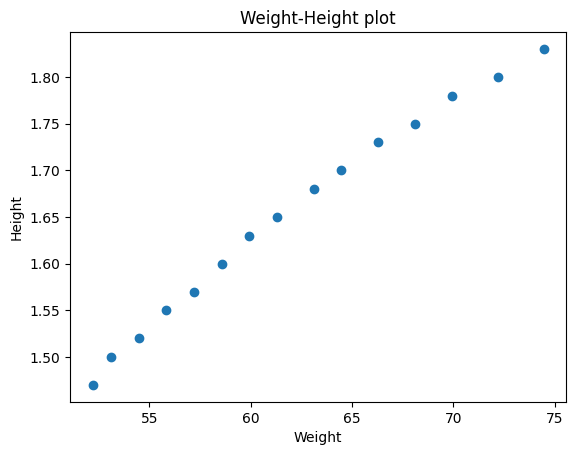

In [5]:
## Visualization

# scatter plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight-Height plot")

In [6]:
## the above plot suggests that there is a clear linear relationship between the weight and height

# use the pearson correlation to visualize this relationship
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


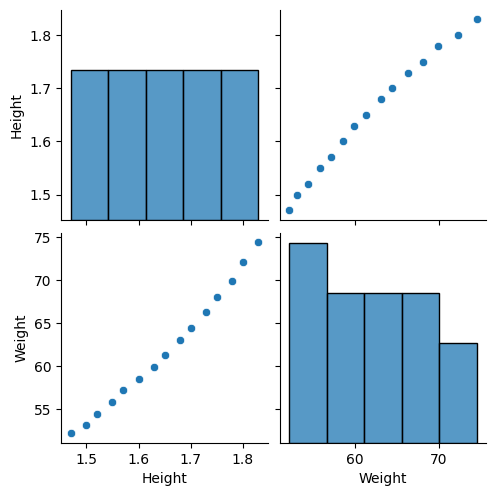

In [7]:
## visualize further - optional
sns.pairplot(df)

In [8]:
## the 5 number summary
df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [9]:
## standardization of the fields
X = df[['Weight']]
y=df['Height']
print("X shape",X.shape)

# scaling into standard normal distribution - with mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

X shape (15, 1)
[[-1.45141437]
 [-1.31756891]
 [-1.11753612]
 [-0.91750333]
 [-0.71747054]
 [-0.51596693]
 [-0.31593414]
 [-0.11590135]
 [ 0.15178959]
 [ 0.35182237]
 [ 0.61804248]
 [ 0.88573342]
 [ 1.15342435]
 [ 1.48730261]
 [ 1.82118087]]


In [10]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
## getting the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
## getting the coefficients of the Linear Regression model
print("Coefficient: ",model.coef_)
print("Intercept is: ",model.intercept_)

Coefficient:  [0.10853481]
Intercept is:  1.6522212635440976


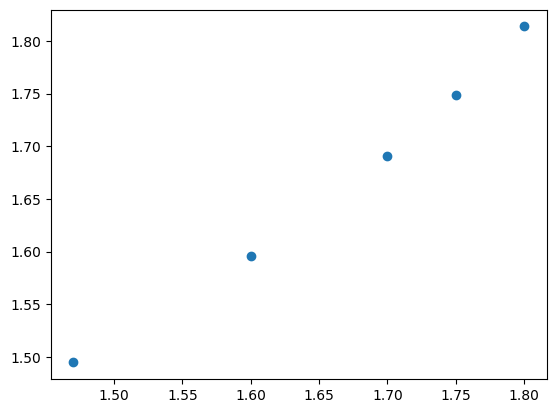

In [13]:
## prediction
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)

In [14]:
## Performance metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2score = r2_score(y_test,y_pred)
adj_r2score = 1-((r2score*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1))

print(f"MSE is {mse}")
print(f"MAE is {mae}")
print(f"RMSE is {rmse}")
print(f"R2 score is {r2score}")
print(f"adjusted R2 score is {adj_r2score}")

MSE is 0.00018098707764730603
MAE is 0.010671269371731152
RMSE is 0.01345314378304588
R2 score is 0.9868697709193771
adjusted R2 score is -0.31582636122583607


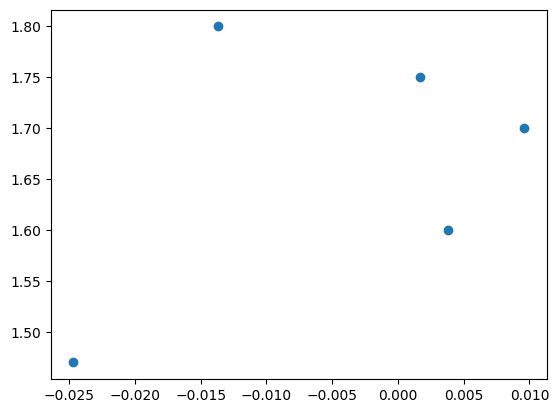

In [15]:
residuals = y_test - y_pred
plt.scatter(residuals,y_test)